# **Working memory training**: DMN, FPN rectuitment and integration -- association with behavior

Karolina Finc | Centre for Modern Interdisciplinary Technologies, Nicolaus Copernicus University in Toruń, Poland

**Last edited:** 04-10-2018

Step 0: Setup
-------------------

In [1]:
# Loading packages
library(psych)
library(tidyverse)
library(data.table)
library(nlme)
library(broom)

# Setting working directory
setwd("~/Dropbox/Projects/LearningBrain/")

# Customizing theme for plotting
theme_training <- theme_bw() + theme(axis.text.y = element_text(size=25, colour='#262626ff'),
          axis.text.x = element_text(size=25, colour='#262626ff'),
          axis.title.y = element_text(size=25, colour='#262626ff'),
          axis.title.x  = element_text(size=25, colour='#262626ff'),
          plot.title = element_text(hjust=0.5, size=25),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour="#262626ff"),
          panel.border = element_rect(colour = "#262626ff", fill=NA, size=1.8),
          panel.background = element_rect(fill="transparent",colour=NA),
          plot.background = element_rect(fill="transparent",colour=NA),
          legend.key = element_rect(fill= "transparent", colour="transparent"),
          strip.background =element_rect(fill="transparent", colour=NA),
          strip.text = element_text(size=25),
          axis.ticks = element_line(colour="#262626ff", size=1, 2),
          axis.ticks.length = unit(.15, "cm"),
          aspect.ratio = 1,
          )

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose


Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse



Step 1: Merging network and behavioral data
-------------------

In [2]:
performance_diff <- read.csv('./data/behavioral/WM_fmri_performance_2_1_diff.csv')
integration <- read.csv('./data/neuroimaging/03-modularity/dynamic/04-recruitment_integration/Power_integration_recruitment_all_networks.csv')

performance_diff$Session <- factor(performance_diff$Session, labels = c('Naive', 'Early', 'Middle', 'Late'))
beh_net <- left_join(performance_diff, integration,  by=c('Subject', 'Group', 'Session'))
head(beh_net)

Warning message:
“Column `Session` joining factors with different levels, coercing to character vector”

Subject,Group,Session,pRT,Accuracy,Dprime,Network,AU,CER,CO,DA,DM,FP,MEM,SAL,SOM,SUB,UNC,VA,VIS
sub-01,Control,Naive,-0.27395,6.504167,0.9752465,AU,0.3684438,0.2426346,0.3000357,0.2494825,0.2512513,0.2567677,0.2614769,0.2737778,0.2969242,0.2996953,0.2547720,0.2809017,0.2612816
sub-01,Control,Naive,-0.27395,6.504167,0.9752465,CER,0.2426346,0.5571250,0.2520625,0.2823409,0.2723448,0.2359050,0.2436000,0.2262014,0.3063393,0.2685769,0.2909554,0.2753333,0.3014194
sub-01,Control,Naive,-0.27395,6.504167,0.9752465,CO,0.3000357,0.2520625,0.3707449,0.2700292,0.2607746,0.2779071,0.2889714,0.2933631,0.2934490,0.3050879,0.2548712,0.2745278,0.2512016
sub-01,Control,Naive,-0.27395,6.504167,0.9752465,DA,0.2494825,0.2823409,0.2700292,0.3678843,0.2718918,0.2959727,0.2957091,0.2801187,0.2689013,0.2448322,0.2617646,0.2694899,0.2870660
sub-01,Control,Naive,-0.27395,6.504167,0.9752465,DM,0.2512513,0.2723448,0.2607746,0.2718918,0.3138508,0.2724117,0.2819845,0.2835862,0.2571034,0.2601214,0.2813701,0.2651475,0.2622742
sub-01,Control,Naive,-0.27395,6.504167,0.9752465,FP,0.2567677,0.2359050,0.2779071,0.2959727,0.2724117,0.3871472,0.2801720,0.3102456,0.2463840,0.2614369,0.2737743,0.2904889,0.2726510


In [11]:
late <- beh_net %>% filter(Session == 'Late')  %>% dplyr::select(pRT, AU:VIS)
naive <- beh_net %>% filter(Session == 'Naive')  %>% dplyr::select(pRT, AU:VIS)
delta <- late - naive
delta_all <- beh_net %>% filter(Session == 'Naive') %>% dplyr::select(Subject, Group, Session, Network) %>% cbind(delta)

Step 2: Plotting
------------

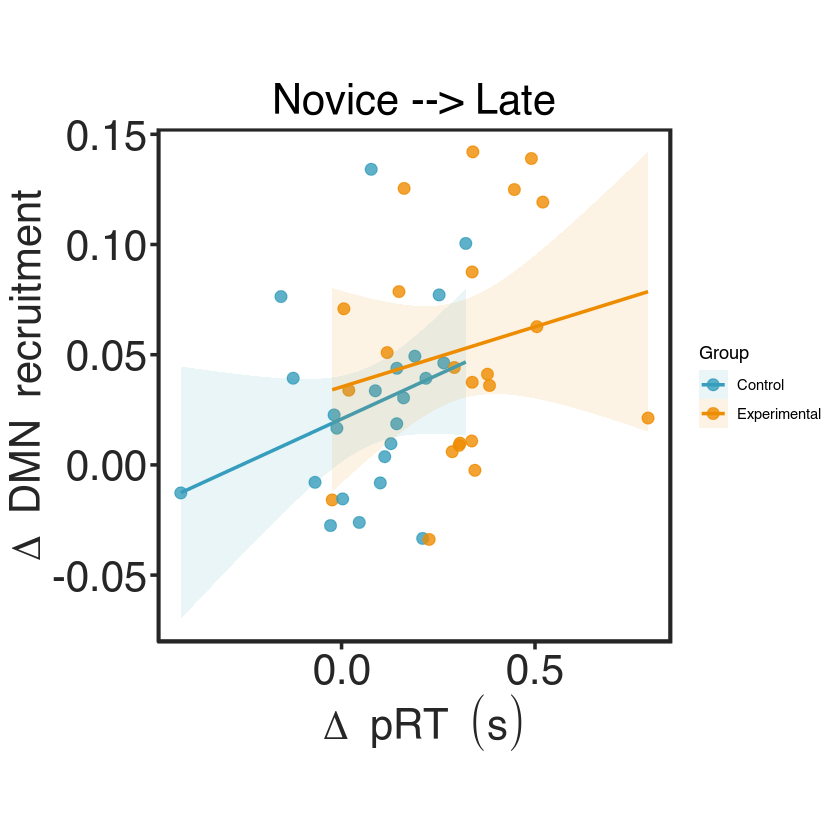

In [14]:
p = delta_all %>% filter(Network == 'DM') %>% ggplot(aes(x = pRT, y = DM)) + 
    geom_point(aes(col = Group), size = 3, alpha = 0.8) + 
    theme(aspect.ratio = 1) + 
    ggtitle('Novice --> Late')+
    xlab(expression(~Delta~pRT~(s))) + 
    ylab(expression(~Delta~DMN~recruitment))+ 
    geom_smooth(method = 'lm', aes(col = Group, fill = Group), alpha = 0.1) + theme_training +
    scale_color_manual(values=c('#379dbc','#ee8c00')) +
    scale_fill_manual(values=c('#379dbc','#ee8c00'))
p

ggsave("figures/Figure_S11.pdf", plot = p, width = 8, height = 5, dpi = 300)  

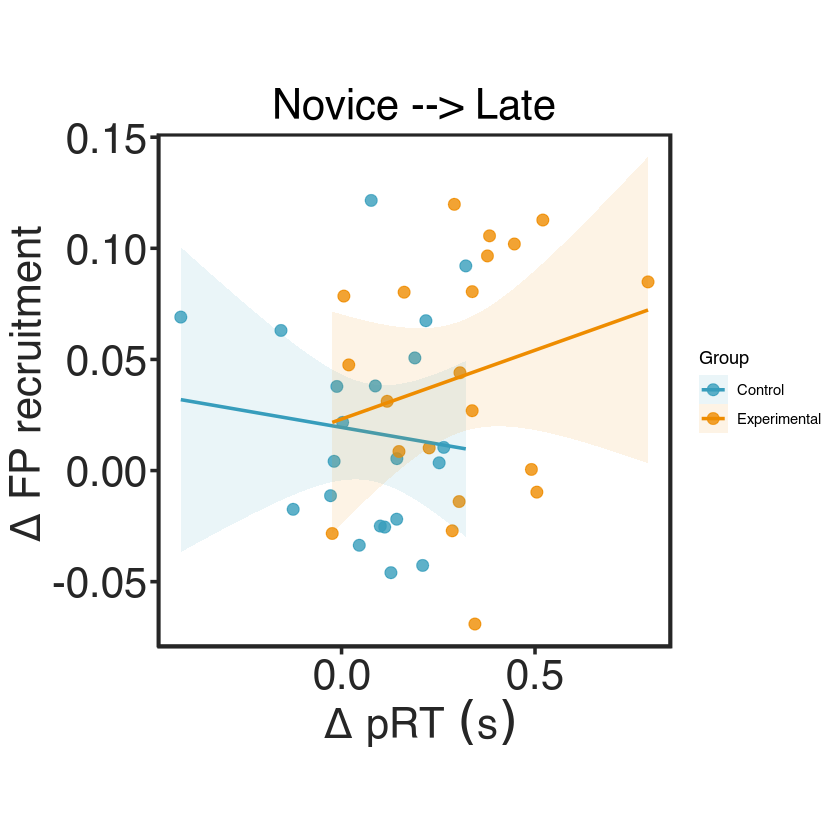

In [24]:
p = delta_all %>% filter(Network == 'FP') %>% ggplot(aes(x = pRT, y = FP_integration)) + 
    geom_point(aes(col = Group), size = 3, alpha = 0.8) + 
    theme(aspect.ratio = 1) + 
    ggtitle('Novice --> Late')+
    xlab(expression(~Delta~pRT~(s))) + 
    ylab(expression(~Delta~FP~recruitment))+ 
    geom_smooth(method = 'lm', aes(col = Group, fill = Group), alpha = 0.1) + theme_training +
    #geom_smooth(method = 'lm', col = '#262626ff', linetype="dashed", alpha = 0.2) +
    scale_color_manual(values=c('#379dbc','#ee8c00')) +
    scale_fill_manual(values=c('#379dbc','#ee8c00'))
p

ggsave("figures//Figure_S12.pdf", plot = p, width = 8, height = 5, dpi = 300)  

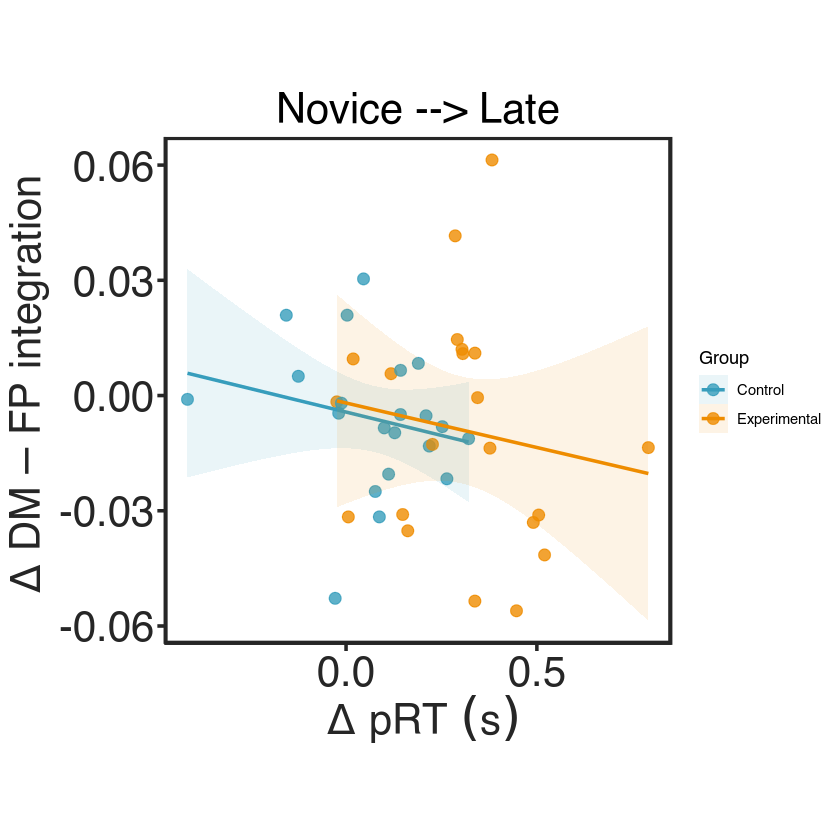

In [25]:
p = delta_all %>% filter(Network == 'FP') %>% ggplot(aes(x = pRT, y = DM_integration)) + 
    geom_point(aes(col = Group), size = 3, alpha = 0.8) + 
    theme(aspect.ratio = 1) + 
    ggtitle('Novice --> Late')+
    xlab(expression(~Delta~pRT~(s))) + 
    ylab(expression(~Delta~DM-FP~integration))+ 
    geom_smooth(method = 'lm', aes(col = Group, fill = Group), alpha = 0.1) + theme_training +
    scale_color_manual(values=c('#379dbc','#ee8c00')) +
    scale_fill_manual(values=c('#379dbc','#ee8c00'))
p

ggsave("figures/Figure_S13.pdf", plot = p, width = 8, height = 5, dpi = 300)  

Step 4: Multilevel modelling (MLM)
--------------------------------------

In [30]:
# DM recruitmnent
baseline <- lme(pRT ~ 1, random = ~ 1|Subject, data = delta_all %>% filter(Network == 'DM'),  method = 'ML',  control = list(opt = "optim"))
network <- update(baseline, .~. + DM)
group <- update(network, .~. + Group)
network_group <- update(group, .~. + DM:Group)
anova(baseline, network, group, network_group)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
baseline,"lme.formula(fixed = pRT ~ 1, data = delta_all %>% filter(Network == ""DM""), random = ~1 | Subject, method = ""ML"", control = list(opt = ""optim""))",1,3,-5.310684,-0.09767525,5.655342,,NA,NA
network,"lme.formula(fixed = pRT ~ DM_integration, data = delta_all %>% filter(Network == ""DM""), random = ~1 | Subject, method = ""ML"", control = list(opt = ""optim""))",2,4,-8.013173,-1.06249426,8.006586,1 vs 2,4.70248863,0.0301189757
group,"lme.formula(fixed = pRT ~ DM_integration + Group, data = delta_all %>% filter(Network == ""DM""), random = ~1 | Subject, method = ""ML"", control = list(opt = ""optim""))",3,5,-18.667115,-9.97876712,14.333558,2 vs 3,12.65394248,0.0003747745
network_group,"lme.formula(fixed = pRT ~ DM_integration + Group + DM_integration:Group, data = delta_all %>% filter(Network == ""DM""), random = ~1 | Subject, method = ""ML"", control = list(opt = ""optim""))",4,6,-16.718668,-6.29265021,14.359334,3 vs 4,0.05155271,0.8203831372


In [31]:
# FP recruitmnent
baseline <- lme(pRT ~ 1, random = ~ 1|Subject, data = delta_all %>% filter(Network == 'FP'),  method = 'ML',  control = list(opt = "optim"))
network <- update(baseline, .~. + FP)
group <- update(network, .~. + Group)
network_group <- update(group, .~. + FPp)
anova(baseline, network, group, network_group)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
baseline,"lme.formula(fixed = pRT ~ 1, data = delta_all %>% filter(Network == ""FP""), random = ~1 | Subject, method = ""ML"", control = list(opt = ""optim""))",1,3,-5.310684,-0.09767525,5.655342,,NA,NA
network,"lme.formula(fixed = pRT ~ FP_integration, data = delta_all %>% filter(Network == ""FP""), random = ~1 | Subject, method = ""ML"", control = list(opt = ""optim""))",2,4,-4.995284,1.95539451,6.497642,1 vs 2,1.684600,0.19431436
group,"lme.formula(fixed = pRT ~ FP_integration + Group, data = delta_all %>% filter(Network == ""FP""), random = ~1 | Subject, method = ""ML"", control = list(opt = ""optim""))",3,5,-16.397255,-7.70890715,13.198628,2 vs 3,13.401971,0.00025136
network_group,"lme.formula(fixed = pRT ~ FP_integration + Group + FP_integration:Group, data = delta_all %>% filter(Network == ""FP""), random = ~1 | Subject, method = ""ML"", control = list(opt = ""optim""))",4,6,-15.522953,-5.09693576,13.761477,3 vs 4,1.125698,0.28869478


In [32]:
# FP-DM integration
baseline <- lme(pRT ~ 1, random = ~ 1|Subject, data = delta_all %>% filter(Network == 'FP'),  method = 'ML',  control = list(opt = "optim"))
network <- update(baseline, .~. + DM_integration)
group <- update(network, .~. + Group)
network_group <- update(group, .~. + DM_integration:Group)
anova(baseline, network, group, network_group)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
baseline,"lme.formula(fixed = pRT ~ 1, data = delta_all %>% filter(Network == ""FP""), random = ~1 | Subject, method = ""ML"", control = list(opt = ""optim""))",1,3,-5.310684,-0.09767525,5.655342,,NA,NA
network,"lme.formula(fixed = pRT ~ DM_integration, data = delta_all %>% filter(Network == ""FP""), random = ~1 | Subject, method = ""ML"", control = list(opt = ""optim""))",2,4,-4.630034,2.32064478,6.315017,1 vs 2,1.3193496,0.2507088131
group,"lme.formula(fixed = pRT ~ DM_integration + Group, data = delta_all %>% filter(Network == ""FP""), random = ~1 | Subject, method = ""ML"", control = list(opt = ""optim""))",3,5,-17.372951,-8.68460300,13.686476,2 vs 3,14.7429174,0.0001232095
network_group,"lme.formula(fixed = pRT ~ DM_integration + Group + DM_integration:Group, data = delta_all %>% filter(Network == ""FP""), random = ~1 | Subject, method = ""ML"", control = list(opt = ""optim""))",4,6,-15.525082,-5.09906460,13.762541,3 vs 4,0.1521312,0.6965069548
